In [ ]:
pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6MB 55kB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 3.2MB 20.5MB/s 
     |████████████████████████████████| 368kB 22.1MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
%%capture
!pip install watermark

In [ ]:
%load_ext watermark
%watermark -p tensorflow,numpy -m

tensorflow: 2.4.1
numpy     : 1.19.5

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [1]:
import os
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation


In [2]:
(x_tr, y_tr), (x_t, y_t) = tf.keras.datasets.fashion_mnist.load_data()
x_tr=np.expand_dims(x_tr,-1)
x_t=np.expand_dims(x_t,-1)

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
shuffle = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
tr_idx, val_idx = next(shuffle.split(x_tr, y_tr))
x_val, y_val = x_tr[val_idx], y_tr[val_idx]
x_tr, y_tr = x_tr[tr_idx], y_tr[tr_idx]
print(x_tr.shape, x_val.shape, x_t.shape)

(50000, 28, 28, 1) (10000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
model= Sequential()
model.add(BatchNormalization(input_shape=x_tr.shape[1:]))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization(input_shape=x_tr.shape[1:]))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

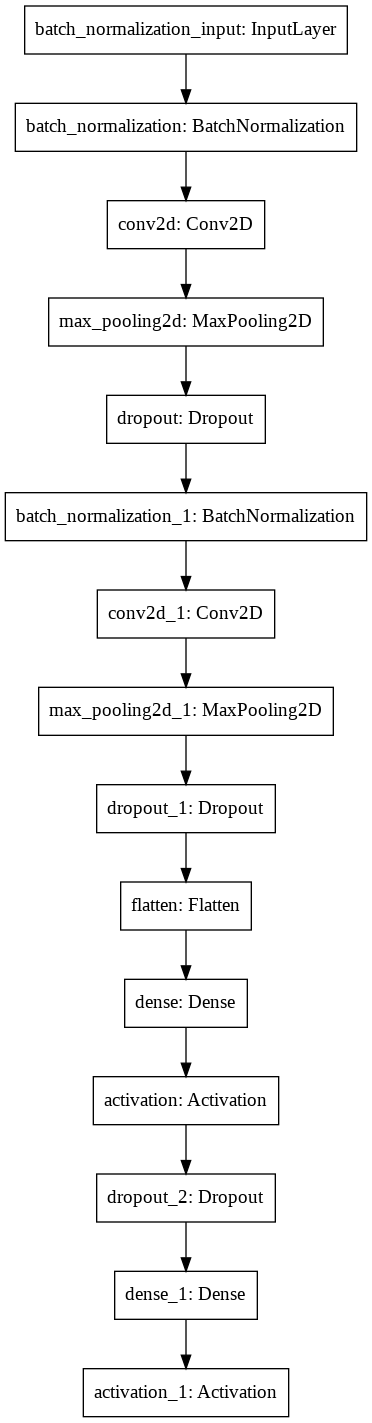

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [8]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

In [ ]:

%%time
def train_gen(batch_size):
  while 1:
    idx = np.random.randint(0, x_tr.shape[0] - batch_size)
    yield x_tr[idx:idx+batch_size], y_tr[idx:idx + batch_size]
    

model.fit_generator(train_gen(512),epochs=15,steps_per_epoch=100,validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 306s 3s/step - loss: 1.4639 - sparse_categorical_accuracy: 0.5345 - val_loss: 1.2855 - val_sparse_categorical_accuracy: 0.8064
Epoch 2/15
100/100 [==============================] - 299s 3s/step - loss: 0.6142 - sparse_categorical_accuracy: 0.7766 - val_loss: 0.9248 - val_sparse_categorical_accuracy: 0.8479
Epoch 3/15
100/100 [==============================] - 302s 3s/step - loss: 0.5067 - sparse_categorical_accuracy: 0.8196 - val_loss: 0.6417 - val_sparse_categorical_accuracy: 0.8736
Epoch 4/15
100/100 [==============================] - 310s 3s/step - loss: 0.4663 - sparse_categorical_accuracy: 0.8340 - val_loss: 0.4236 - val_sparse_categorical_accuracy: 0.8891
Epoch 5/15
100/100 [==============================] - 317s 3s/step - loss: 0.4147 - sparse_categorical_accuracy: 0.8492 - val_loss: 0.3475 - val_sparse_categorical_accuracy: 0.8949
Epoch 6/15
100/100 [==============================] - 311s 3s/step - loss: 0.3844 - sparse_cate

In [ ]:
c=[302,302,299,302,300,300,300,299,299,299,300,300,300,300,300]
   
  

In [ ]:
len(c)

15

In [ ]:
sum(c)

4502